# Data Analysis Python Project - Blinkit Analysis

## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Raw Data

In [2]:
df =pd.read_csv("C:\\Users\\VIKASH\\OneDrive\\Desktop\\Data Science Projects\\Blinkit Analysis\\BlinkIT Grocery Data.csv")

In [3]:
df.head(5)

Item_Fat_Content Item_Identifier              Item_Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet_Size        Outlet_Type  Item_Visibility  Item_Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket Type2         0.008596        11.80  115.3492   
2       Small  Supermarket Type1         0.025896        13.85  165.0210   
3        High  Supermarket Type1         0.042278        12.15  126.5046   
4       Small  Supermarket Type1         0.033970        19.60   55.1614   

   Rating  
0     5.0  
1     5.0  
2     5.0  
3     5.0  
4     5.0

In [4]:
df.tail()

Item_Fat_Content Item_Identifier           Item_Type  \
8518          low fat           NCT53  Health and Hygiene   
8519          low fat           FDN09         Snack Foods   
8520          low fat           DRE13         Soft Drinks   
8521              reg           FDT50               Dairy   
8522              reg           FDM58         Snack Foods   

      Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
8518                       2018            OUT027               Tier 3   
8519                       2018            OUT027               Tier 3   
8520                       2018            OUT027               Tier 3   
8521                       2018            OUT027               Tier 3   
8522                       2018            OUT027               Tier 3   

     Outlet_Size        Outlet_Type  Item_Visibility  Item_Weight     Sales  \
8518      Medium  Supermarket Type3         0.000000          NaN  164.5526   
8519      Medium  Supermarket Type3         0.034706          NaN  241.6828   
8520      Medium  Supermarket Type3         0.027571          NaN   86.6198   
8521      Medium  Supermarket Type3         0.107715          NaN   97.8752   
8522      Medium  Supermarket Type3         0.000000          NaN  112.2544   

      Rating  
8518     4.0  
8519     4.0  
8520     4.0  
8521     4.0  
8522     4.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Identifier            8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Visibility            8523 non-null   float64
 9   Item_Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_Type                       0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Item_Visibility                 0
Item_Weight                  1463
Sales                           0
Rating                          0
dtype: int64

#### Size of data

In [7]:
print("Size of a data: ", df.shape)

Size of a data:  (8523, 12)


#### Field info

In [8]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Visibility',
       'Item_Weight', 'Sales', 'Rating'],
      dtype='object')

#### Data Types

In [9]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_Type                     object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Visibility              float64
Item_Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### Data Cleaning

In [10]:
print(df['Item_Fat_Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [12]:
print(df['Item_Fat_Content'].unique())

['Regular' 'Low Fat']


### BUSINESS REQUIREMENT


#### KPI’s Requirements


In [13]:
# Total Sales
Total_Sales = df['Sales'].sum()
# Average Sales
Avg_Sales = df['Sales'].mean()
# Number of items
No_of_Items = df['Sales'].count()
# Average Rating
Avg_rating = df['Rating'].mean()

# Display
print(f"Total Sales: ${Total_Sales:,.1f}")
print(f"Average Sales: ${Avg_Sales:,.0f}")
print(f"Number of items sold: {No_of_Items}")
print(f"Average Rating: {Avg_rating:.0f}")



Total Sales: $1,201,681.5
Average Sales: $141
Number of items sold: 8523
Average Rating: 4


### Chart's Reuirement

#### Total Sales by Fat Content


In [14]:
sales_by_fat= df.groupby('Item_Fat_Content')['Sales'].sum()

In [15]:
sales_by_fat

Item_Fat_Content
Low Fat    776319.6884
Regular    425361.8044
Name: Sales, dtype: float64

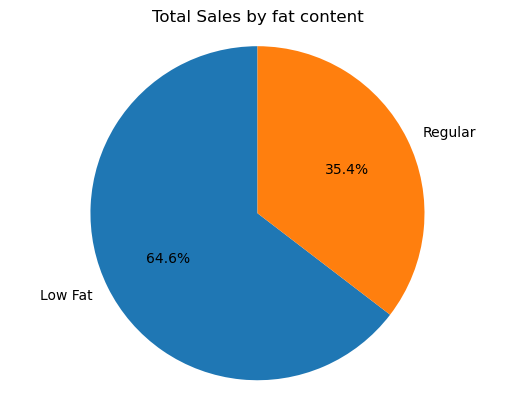

In [16]:
plt.pie(sales_by_fat,labels = sales_by_fat.index, autopct='%.1f%%',startangle=90)
plt.title('Total Sales by fat content')
plt.axis('equal')
plt.show()

#### Total Sales by Item Type:


In [17]:
sales_by_ItemType = df.groupby('Item_Type')['Sales'].sum().sort_values(ascending=False)

In [18]:
sales_by_ItemType

Item_Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Canned                    90706.7290
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1670
Breads                    35379.1198
Hard Drinks               29334.6806
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

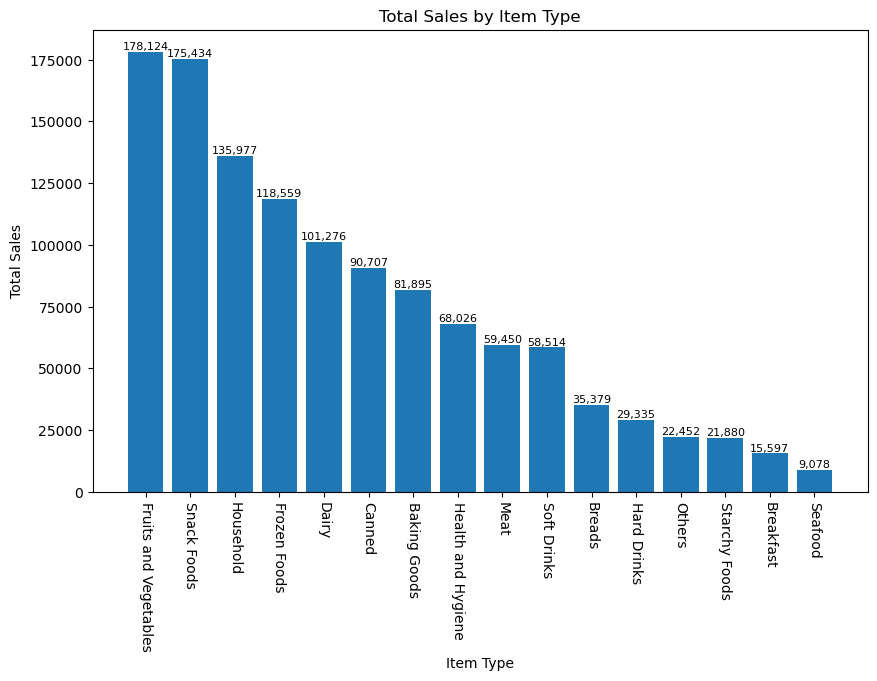

In [19]:
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_ItemType.index,sales_by_ItemType.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title("Total Sales by Item Type")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}',ha='center', va='bottom',fontsize=8)
    
plt.show()

####  Fat Content by Outlet for Total Sales

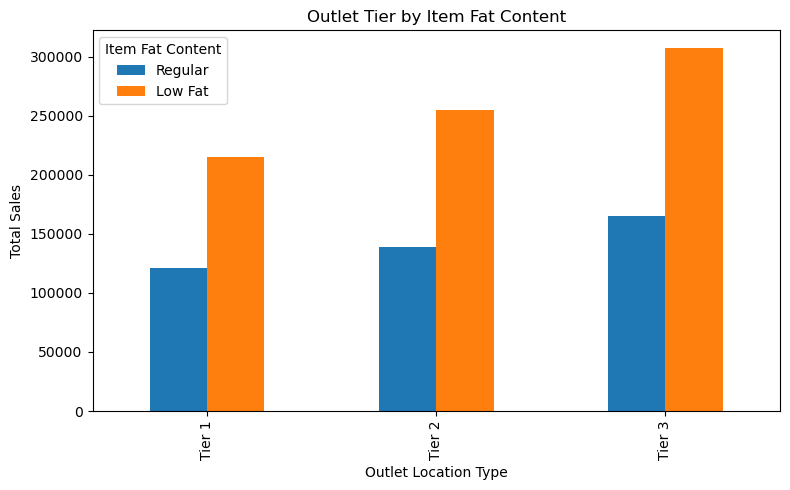

In [20]:
grouped = df.groupby(['Outlet_Location_Type','Item_Fat_Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title="Outlet Tier by Item Fat Content")
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment:


In [21]:
sales_by_Establishment = df.groupby('Outlet_Establishment_Year')['Sales'].sum().sort_index()

In [22]:
sales_by_Establishment

Outlet_Establishment_Year
2011     78131.5666
2012    130476.8598
2014    131809.0156
2015    130942.7802
2016    132113.3698
2017    133103.9070
2018    204522.2570
2020    129103.9604
2022    131477.7764
Name: Sales, dtype: float64

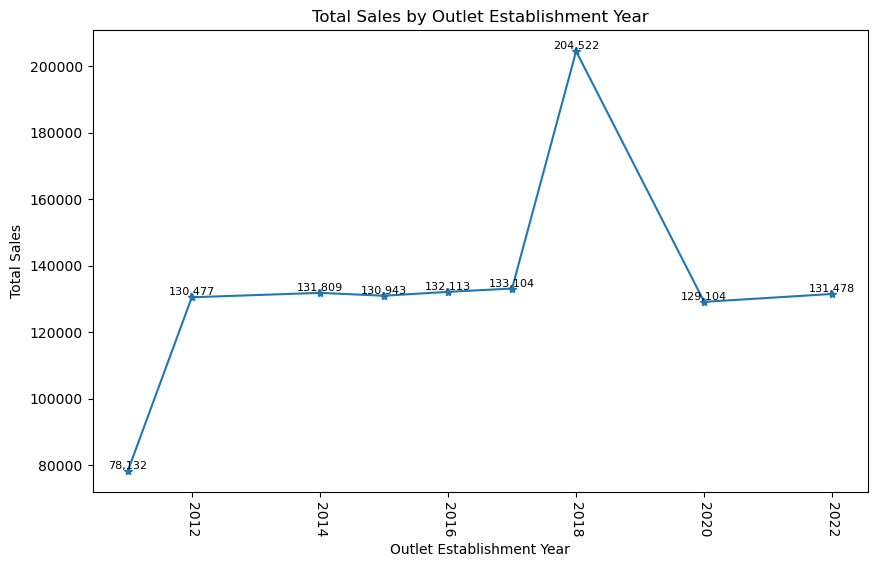

In [23]:
plt.figure(figsize=(10,6))
plt.plot(sales_by_Establishment.index,sales_by_Establishment.values,linestyle='-', marker='*')
plt.xticks(rotation=-90)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title("Total Sales by Outlet Establishment Year")

for x,y in zip (sales_by_Establishment.index,sales_by_Establishment.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
    
plt.tight_layout
plt.show()

### Percentage of Sales by Outlet Size

In [24]:
sales_by_size = df.groupby('Outlet_Size')['Sales'].sum()
sales_by_size

Outlet_Size
High      248991.5860
Medium    507895.7364
Small     444794.1704
Name: Sales, dtype: float64

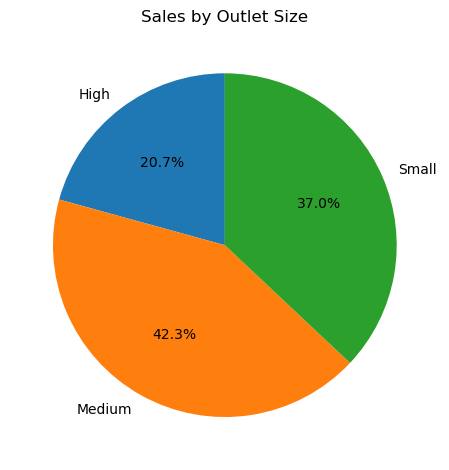

In [25]:
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title("Sales by Outlet Size")
plt.tight_layout()
plt.show()

### Sales by Outlet Location

In [26]:
Sales_by_Location = df.groupby(['Outlet_Location_Type'])["Sales"].sum().reset_index()
Sales_by_Location

Outlet_Location_Type        Sales
0               Tier 1  336397.8120
1               Tier 2  393150.6476
2               Tier 3  472133.0332

In [27]:
Sales_by_Location=Sales_by_Location.sort_values('Sales',ascending=False)
Sales_by_Location

Outlet_Location_Type        Sales
2               Tier 3  472133.0332
1               Tier 2  393150.6476
0               Tier 1  336397.8120

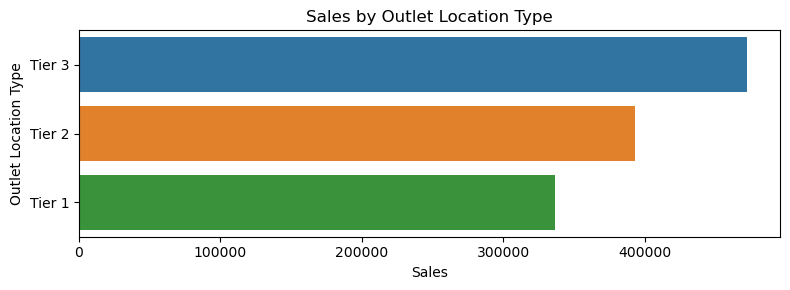

In [28]:
plt.figure(figsize=(8,3))
ax= sns.barplot(x='Sales',y='Outlet_Location_Type',data = Sales_by_Location)
plt.title('Sales by Outlet Location Type')
plt.xlabel('Sales')
plt.ylabel("Outlet Location Type")

plt.tight_layout() # Ensure Layout Fit Without Scroll
plt.show()

### All Metrics by Outlet Type

In [29]:
df

Item_Fat_Content Item_Identifier              Item_Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          Low Fat           NCT53     Health and Hygiene   
8519          Low Fat           FDN09            Snack Foods   
8520          Low Fat           DRE13            Soft Drinks   
8521          Regular           FDT50                  Dairy   
8522          Regular           FDM58            Snack Foods   

      Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018               Tier 3   
2                          2016            OUT046               Tier 1   
3                          2014            OUT013               Tier 3   
4                          2015            OUT045               Tier 2   
...                         ...               ...                  ...   
8518                       2018            OUT027               Tier 3   
8519                       2018            OUT027               Tier 3   
8520                       2018            OUT027               Tier 3   
8521                       2018            OUT027               Tier 3   
8522                       2018            OUT027               Tier 3   

     Outlet_Size        Outlet_Type  Item_Visibility  Item_Weight     Sales  \
0         Medium  Supermarket Type1         0.100014        15.10  145.4786   
1         Medium  Supermarket Type2         0.008596        11.80  115.3492   
2          Small  Supermarket Type1         0.025896        13.85  165.0210   
3           High  Supermarket Type1         0.042278        12.15  126.5046   
4          Small  Supermarket Type1         0.033970        19.60   55.1614   
...          ...                ...              ...          ...       ...   
8518      Medium  Supermarket Type3         0.000000          NaN  164.5526   
8519      Medium  Supermarket Type3         0.034706          NaN  241.6828   
8520      Medium  Supermarket Type3         0.027571          NaN   86.6198   
8521      Medium  Supermarket Type3         0.107715          NaN   97.8752   
8522      Medium  Supermarket Type3         0.000000          NaN  112.2544   

      Rating  
0        5.0  
1        5.0  
2        5.0  
3        5.0  
4        5.0  
...      ...  
8518     4.0  
8519     4.0  
8520     4.0  
8521     4.0  
8522     4.0  

[8523 rows x 12 columns]

In [30]:
    pip install --upgrade jupyter nbconvert pandoc

Note: you may need to restart the kernel to use updated packages.
